In [1]:
# Auto reload, no need to restart notebook everytime an imported module changes.
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import seaborn as sns

from plotting import plot_scores, plot_aurocs, plot_quantized_aurocs, plot_pca

sns.set()

import warnings

warnings.filterwarnings("ignore")

In [2]:
# path to up-to-date results of various GNN models
results_files = {
    'default_gcn': '../agg_results/graph_gcn_results.json',
    'default_gin': '../agg_results/graph_gin_results.json',
    'default_gin_small': '../agg_results/graph_gin_small_results.json',
    'default_cheb': '../agg_results/graph_cheb_results.json',
    'default_gatedgcn': '../agg_results/graph_gatedgcn_results.json',
    'default_gcn2': '../agg_results/graph_gcn2_results.json',
}

save_dirs = {
    'default_gcn': 'outputs/graph/gcn_default',
    'default_gin': 'outputs/graph/gin_default',
    'default_gin_small': 'outputs/graph/gin_small_default',
    'default_cheb': 'outputs/graph/cheb_default',
    'default_gatedgcn': 'outputs/graph/default_gatedgcn',
    'default_gcn2': 'outputs/graph/default_gcn2',
}

name_dict = {
    'PyG-TUDataset_DD': 'D&D',
    'PyG-TUDataset_ENZYMES': 'ENZYMES',
    'PyG-TUDataset_PROTEINS': 'PROTEINS',
    'PyG-TUDataset_NCI1': 'NCI1',
    'PyG-TUDataset_IMDB-BINARY': 'IMDB-BINARY',
    'PyG-TUDataset_REDDIT-BINARY': 'REDDIT-BINARY',
    'PyG-TUDataset_REDDIT-MULTI-5K': 'REDDIT-MULTI-5K',
    'PyG-TUDataset_COLLAB': 'COLLAB',
    'PyG-TUDataset_MUTAG': 'MUTAG',
    'PyG-TUDataset_NCI109': 'NCI109',
    'PyG-TUDataset_Synthie': 'Synthie',
    'PyG-TUDataset_SYNTHETICnew': 'SYNTHETICnew',
    'PyG-GNNBenchmarkDataset_MNIST': 'MNIST',
    'PyG-GNNBenchmarkDataset_CIFAR10': 'CIFAR10',
    'PyG-GNNBenchmarkDataset_PATTERN': 'PATTERN',
    'PyG-GNNBenchmarkDataset_CLUSTER': 'CLUSTER',
    'PyG-MalNetTiny_LocalDegreeProfile': 'MalNetTiny',
    'PyG-PPI_ppi': 'PPI',
    'nx_smallworld': 'Small-World',
    'nx_scalefree': 'Scale-Free',
    'OGB_ogbg-molhiv': 'ogbg-molhiv',
    'OGB_ogbg-moltox21': 'ogbg-moltox21',
    'OGB_ogbg-molpcba': 'ogbg-molpcba',
    'OGB_PCQM4Mv2-subset': 'PCQM4Mv2-subset'
    }

pert_dict = {
    'none': '-',
    'Fragmented-k1': 'Frag-k1',
    'Fragmented-k2': 'Frag-k2',
    'Fragmented-k3': 'Frag-k3',
    'FullyConnected': 'FullyConn',
    'NoEdges': 'NoEdges',
    'NoFeatures': 'NoNodeFtrs',
    'NodeDegree': 'NodeDeg',
    'FiedlerFragmentation': 'FiedlerFrag',
    'BandpassFiltering-lo': 'LowPass',
    'BandpassFiltering-mid': 'MidPass',
    'BandpassFiltering-hi': 'HighPass',
    'RandomNodeFeatures': 'RandFtrs',
    'RandomEdgeRewire': 'RandRewire'
}

ind_cat_dict = {
    'D&D': 'I-2',
    'ENZYMES': 'I-1',
    'PROTEINS': 'I-2',
    'NCI1': 'I-3',
    'IMDB-BINARY': 'I-3',
    'REDDIT-BINARY': 'I-3',
    'REDDIT-MULTI-5K': 'I-3',
    'COLLAB': 'I-3',
    'MUTAG': 'I-2',
    'NCI109': 'I-3',
    'Synthie': 'I-3',
    'SYNTHETICnew': 'I-3',
    'MNIST': 'I-1',
    'CIFAR10': 'I-1',
    'PATTERN': 'I-3',
    'CLUSTER': 'I-3',
    'MalNetTiny': 'I-2',
    'Small-World': 'I-2',
    'Scale-Free': 'I-2',
    'ogbg-molhiv': 'I-2',
    'ogbg-moltox21': 'I-2',
    'ogbg-molpcba': 'I-2',
    'PCQM4Mv2-subset': 'I-1',
    'PPI': 'I-3'
    }
ind_cat_dict = {k: ind_cat_dict[k] for k in sorted(ind_cat_dict)}

In [3]:
conf = 'default_gcn'
results_file = results_files[conf]
save_dir = save_dirs[conf]

In [4]:
df = pd.read_json(results_file)
df['Dataset'] = df['Dataset'].apply(name_dict.get)
df['Perturbation'] = df['Perturbation'].apply(pert_dict.get)
df = df[df['Dataset'].notna()]
df

,Dataset,Perturbation,Split,score-epoch,score-time_iter,score-accuracy,score-macro-f1,score-auc,score-precision,score-recall,score-f1,score-ap
0,MalNetTiny,NodeDeg,train,55,0.09223,0.96972,0.96971,0.99738,NaN,NaN,NaN,NaN
1,MalNetTiny,NodeDeg,val,55,0.06498,0.90400,0.90331,0.98475,NaN,NaN,NaN,NaN
2,MalNetTiny,NodeDeg,test,55,0.06413,0.89620,0.89531,0.98170,NaN,NaN,NaN,NaN
3,IMDB-BINARY,NodeDeg,train,39,0.01613,0.81812,NaN,0.90811,0.80093,0.847,0.8229,NaN
4,IMDB-BINARY,NodeDeg,val,39,0.00853,0.77400,NaN,0.86866,0.76134,0.812,0.7816,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
994,PPI,RandRewire,val,290,0.01246,0.00000,0.21437,0.63765,NaN,NaN,NaN,NaN
995,PPI,RandRewire,test,290,0.01126,0.00000,0.21285,0.63945,NaN,NaN,NaN,NaN
996,PCQM4Mv2-subset,RandRewire,train,48,0.01964,0.36569,0.35581,0.90276,NaN,NaN,NaN,NaN
997,PCQM4Mv2-subset,RandRewire,val,48,0.01195,0.29565,0.29731,0.87590,NaN,NaN,NaN,NaN


In [5]:
#######################
split_type = 'test'
score_type = 'auc'
#######################

score_name = f'score-{score_type}'
df = df[df['Split'] == split_type]
df = df[df[score_name].notna()]

datasets = sorted(df['Dataset'].unique())
# perturbations = sorted(df['Perturbation'].unique())
perturbations = [
    '-',
    'RandFtrs',
    'NoNodeFtrs',
    'NodeDeg',
    'LowPass',
    'MidPass',
    'HighPass',
    'RandRewire',
    'NoEdges',
    'FullyConn',
    'Frag-k1',
    'Frag-k2',
    'Frag-k3',
    'FiedlerFrag',
]

In [6]:
score_mat = np.zeros((len(datasets), len(perturbations)))
score_mat[:] = np.nan

for dataset, group in df.groupby('Dataset'):
    dataset_idx = datasets.index(dataset)

    for perturbation, score in group[['Perturbation', score_name]].values:
        perturbation_idx = perturbations.index(perturbation)
        score_mat[dataset_idx, perturbation_idx] = score * 100

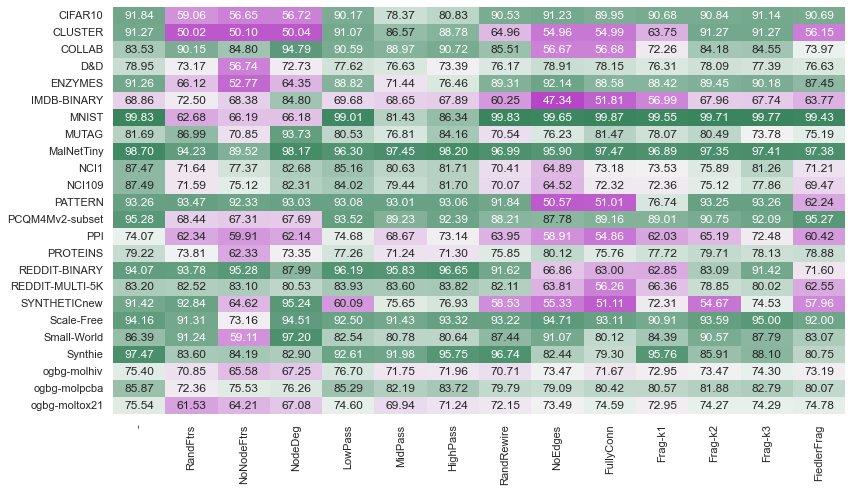

In [7]:
plot_scores(score_mat, datasets, perturbations, figsize=(12, 7), save_dir=save_dir)

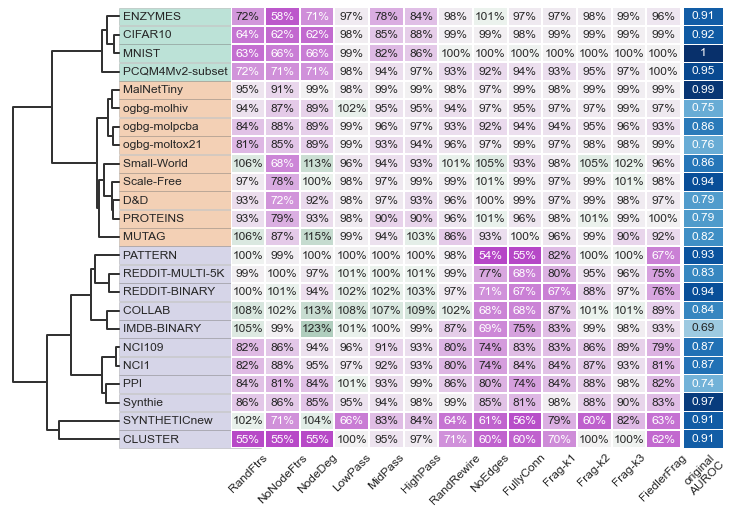

In [8]:
if True:  # Color datasets by their cluster assignment.
    assignment_dict = ind_cat_dict
    palette = sns.color_palette("Dark2", 3)
else:
    assignment_dict = None
    palette = None
plot_aurocs(score_mat, datasets, perturbations,
            figsize=(16, 9), save_dir=save_dir, assignment_dict=assignment_dict, palette=palette,
            score_col_pos=[0.502, 0.130, 0.035, 0.680],  dendrogram_pos_param=(0.096, 1), y_tick_left_shift=0.23)

In [9]:
# plot_quantized_aurocs(score_mat, datasets, perturbations, figsize=(16, 8), save_dir=save_dir,
#             score_col_pos=[0.502, 0.0578, 0.035, 0.735],  dendrogram_pos_param=(0.096, 1), y_tick_left_shift=0.23)

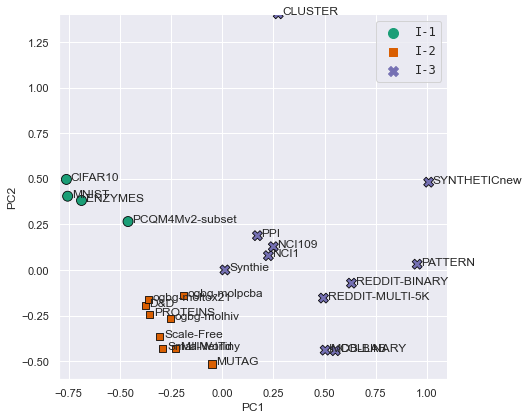

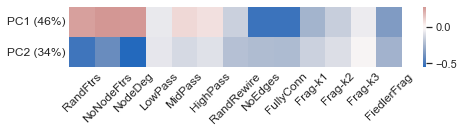

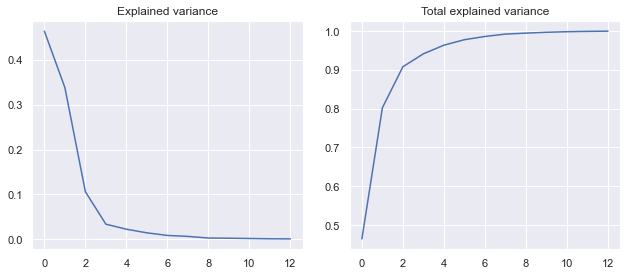

[0.46418872 0.80238801 0.90822197 0.94162248 0.96385031 0.97794622
 0.98627756 0.99244906 0.99496327 0.99707981 0.99856045 0.9994381
 1.        ]


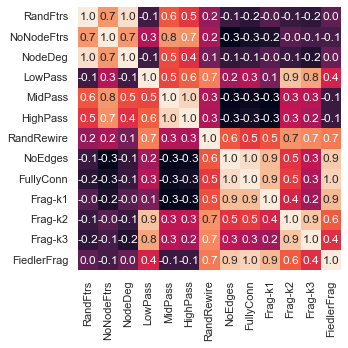

In [10]:
color_labels = list(ind_cat_dict.values())
palette_dark2 = sns.color_palette("Dark2", 3)
palette = sns.color_palette([palette_dark2[0], palette_dark2[2], palette_dark2[1]])  # HACK: need to reorder colors to match
plot_pca(score_mat, datasets, perturbations, figsize=(7.5, 6), save_dir=save_dir,
         pca_xlimit=[-.8, 1.1], pca_ylimit=[-.6, 1.4],
         hue=color_labels,
         style=color_labels,
         palette=palette,
         edgecolor='black',
         s=100)

In [11]:
# Compare log2 vs linear

score_diff_mat_temp = score_mat[:, 1:] / score_mat[:, 0:1]
score_diff_mat = np.log2(score_diff_mat_temp)

def linmap(x):
    x = x - 1
    x = x * 2 if x < 0 else x
    return x

linmap = np.vectorize(linmap)
score_diff_lin_mat = linmap(score_diff_mat_temp)
avg_diff = np.mean(np.abs(score_diff_mat-score_diff_lin_mat))

print(np.min(score_diff_lin_mat), np.max(score_diff_lin_mat))
print(avg_diff)

-0.9154039997855343 0.23141936046005074
0.03451710058808505
